In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
rain = pd.read_csv('data/rain_data_aus.csv')

# Data cleaning

In [3]:
rain.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,...,16.9,21.8,No,0.0,No,29.48,28.400000,12,5.115360,0.089825
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,...,17.2,24.3,No,0.0,No,32.12,2.208569,10,21.497100,0.023477
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,...,21.0,23.2,No,0.0,No,32.84,38.000000,17,20.782859,0.027580
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,...,18.1,26.5,No,1.0,No,35.60,21.200000,8,12.028646,0.023962
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,...,17.8,29.7,No,0.2,No,40.76,41.600000,9,11.883546,0.220164


In [4]:
rain.isna().sum()

date                    0
location                0
mintemp               637
maxtemp               322
rainfall             1406
evaporation         60843
sunshine            67816
humidity9am          1774
humidity3pm          3610
pressure9am         14014
pressure3pm         13981
cloud9am            53657
cloud3pm            57094
temp9am               904
temp3pm              2726
raintoday            1406
amountOfRain            0
raintomorrow            0
temp                  322
humidity             3610
precipitation3pm        0
precipitation9am        0
modelo_vigente          0
dtype: int64

In [5]:
rain = rain.dropna()
rain

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,20.0,13.0,1006.3,...,26.6,33.4,No,0.0,No,44.24,17.6,5,15.165784,0.011320
5940,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,30.0,8.0,1012.9,...,20.3,27.0,No,0.0,No,36.68,11.6,9,9.750834,0.001683
5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,42.0,22.0,1012.3,...,28.7,34.9,No,0.0,No,47.12,28.4,11,5.557986,0.061026
5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,37.0,22.0,1012.7,...,29.1,35.6,No,0.0,No,48.08,28.4,10,17.820001,0.010724
5944,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,19.0,15.0,1010.7,...,33.6,37.6,No,0.0,No,51.20,20.0,9,13.217116,0.103292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139108,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,63.0,32.0,1013.9,...,24.5,32.3,No,0.0,No,42.08,40.4,7,15.000004,0.008671
139109,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,56.0,28.0,1014.6,...,24.8,32.0,No,0.0,No,41.12,35.6,12,3.721395,0.052358
139110,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,46.0,23.0,1015.3,...,24.8,32.1,No,0.0,No,41.36,29.6,10,18.462662,0.005346
139111,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,62.0,58.0,1014.9,...,24.8,29.2,No,0.0,No,40.16,71.6,6,16.343690,0.025044


In [6]:
rain['raintomorrow']=rain['raintomorrow'].map({'No':'0','Yes':'1'})
rain['raintomorrow']=rain['raintomorrow'].astype(int)

rain['raintoday']=rain['raintoday'].map({'No':'0','Yes':'1'})
rain['raintoday']=rain['raintoday'].astype(int)

In [7]:
rain[['raintomorrow','raintoday']].head()

,raintomorrow,raintoday
5939,0,0
5940,0,0
5942,0,0
5943,0,0
5944,0,0


# Exploratory data analysis

In [8]:
rain.corr()['raintomorrow']

mintemp             0.088964
maxtemp            -0.144498
rainfall            0.253773
evaporation        -0.127257
sunshine           -0.449261
humidity9am         0.265360
humidity3pm         0.447742
pressure9am        -0.255934
pressure3pm        -0.231428
cloud9am            0.319410
cloud3pm            0.389891
temp9am            -0.016180
temp3pm            -0.181295
raintoday           0.308621
amountOfRain        0.492611
raintomorrow        1.000000
temp               -0.112636
humidity            0.406002
precipitation3pm    0.006578
precipitation9am   -0.013366
modelo_vigente      0.863107
Name: raintomorrow, dtype: float64

In [9]:
# amountOfRain -> maior correlação

# Predictions

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [11]:
#Tentativa 1
#X=rain[['amountOfRain']]
#y=rain['raintomorrow']

In [12]:
#Tentativa  2
#X=rain[['sunshine']]
#y=rain['raintomorrow']

In [13]:
rain.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
       'amountOfRain', 'raintomorrow', 'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'modelo_vigente'],
      dtype='object')

In [14]:
#Tentativa  3
X=rain[[ 'mintemp', 'maxtemp', 'rainfall','evaporation','sunshine',
        'humidity9am', 'humidity3pm','pressure9am', 'pressure3pm',
        'cloud9am', 'cloud3pm', 'temp9am','temp3pm', 'raintoday',
        'temp','humidity', 'precipitation3pm','precipitation9am']]
y=rain['raintomorrow']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
tree = DecisionTreeClassifier(max_depth=9)
tree

DecisionTreeClassifier(max_depth=9)

In [17]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9)

In [18]:
tree.score(X_test,y_test)

0.8366440568475452

<AxesSubplot:>

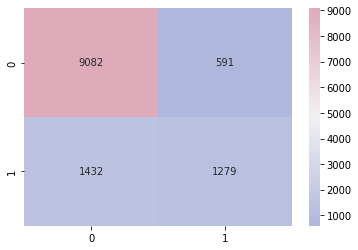

In [19]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
sns.heatmap(confusion_matrix(y_test, tree.predict(X_test)),cmap=cmap1, annot=True, fmt='g')

<AxesSubplot:>

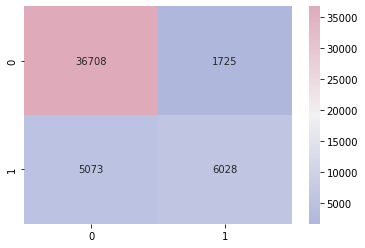

In [20]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
sns.heatmap(confusion_matrix(y_train, tree.predict(X_train)),cmap=cmap1, annot=True, fmt='g')

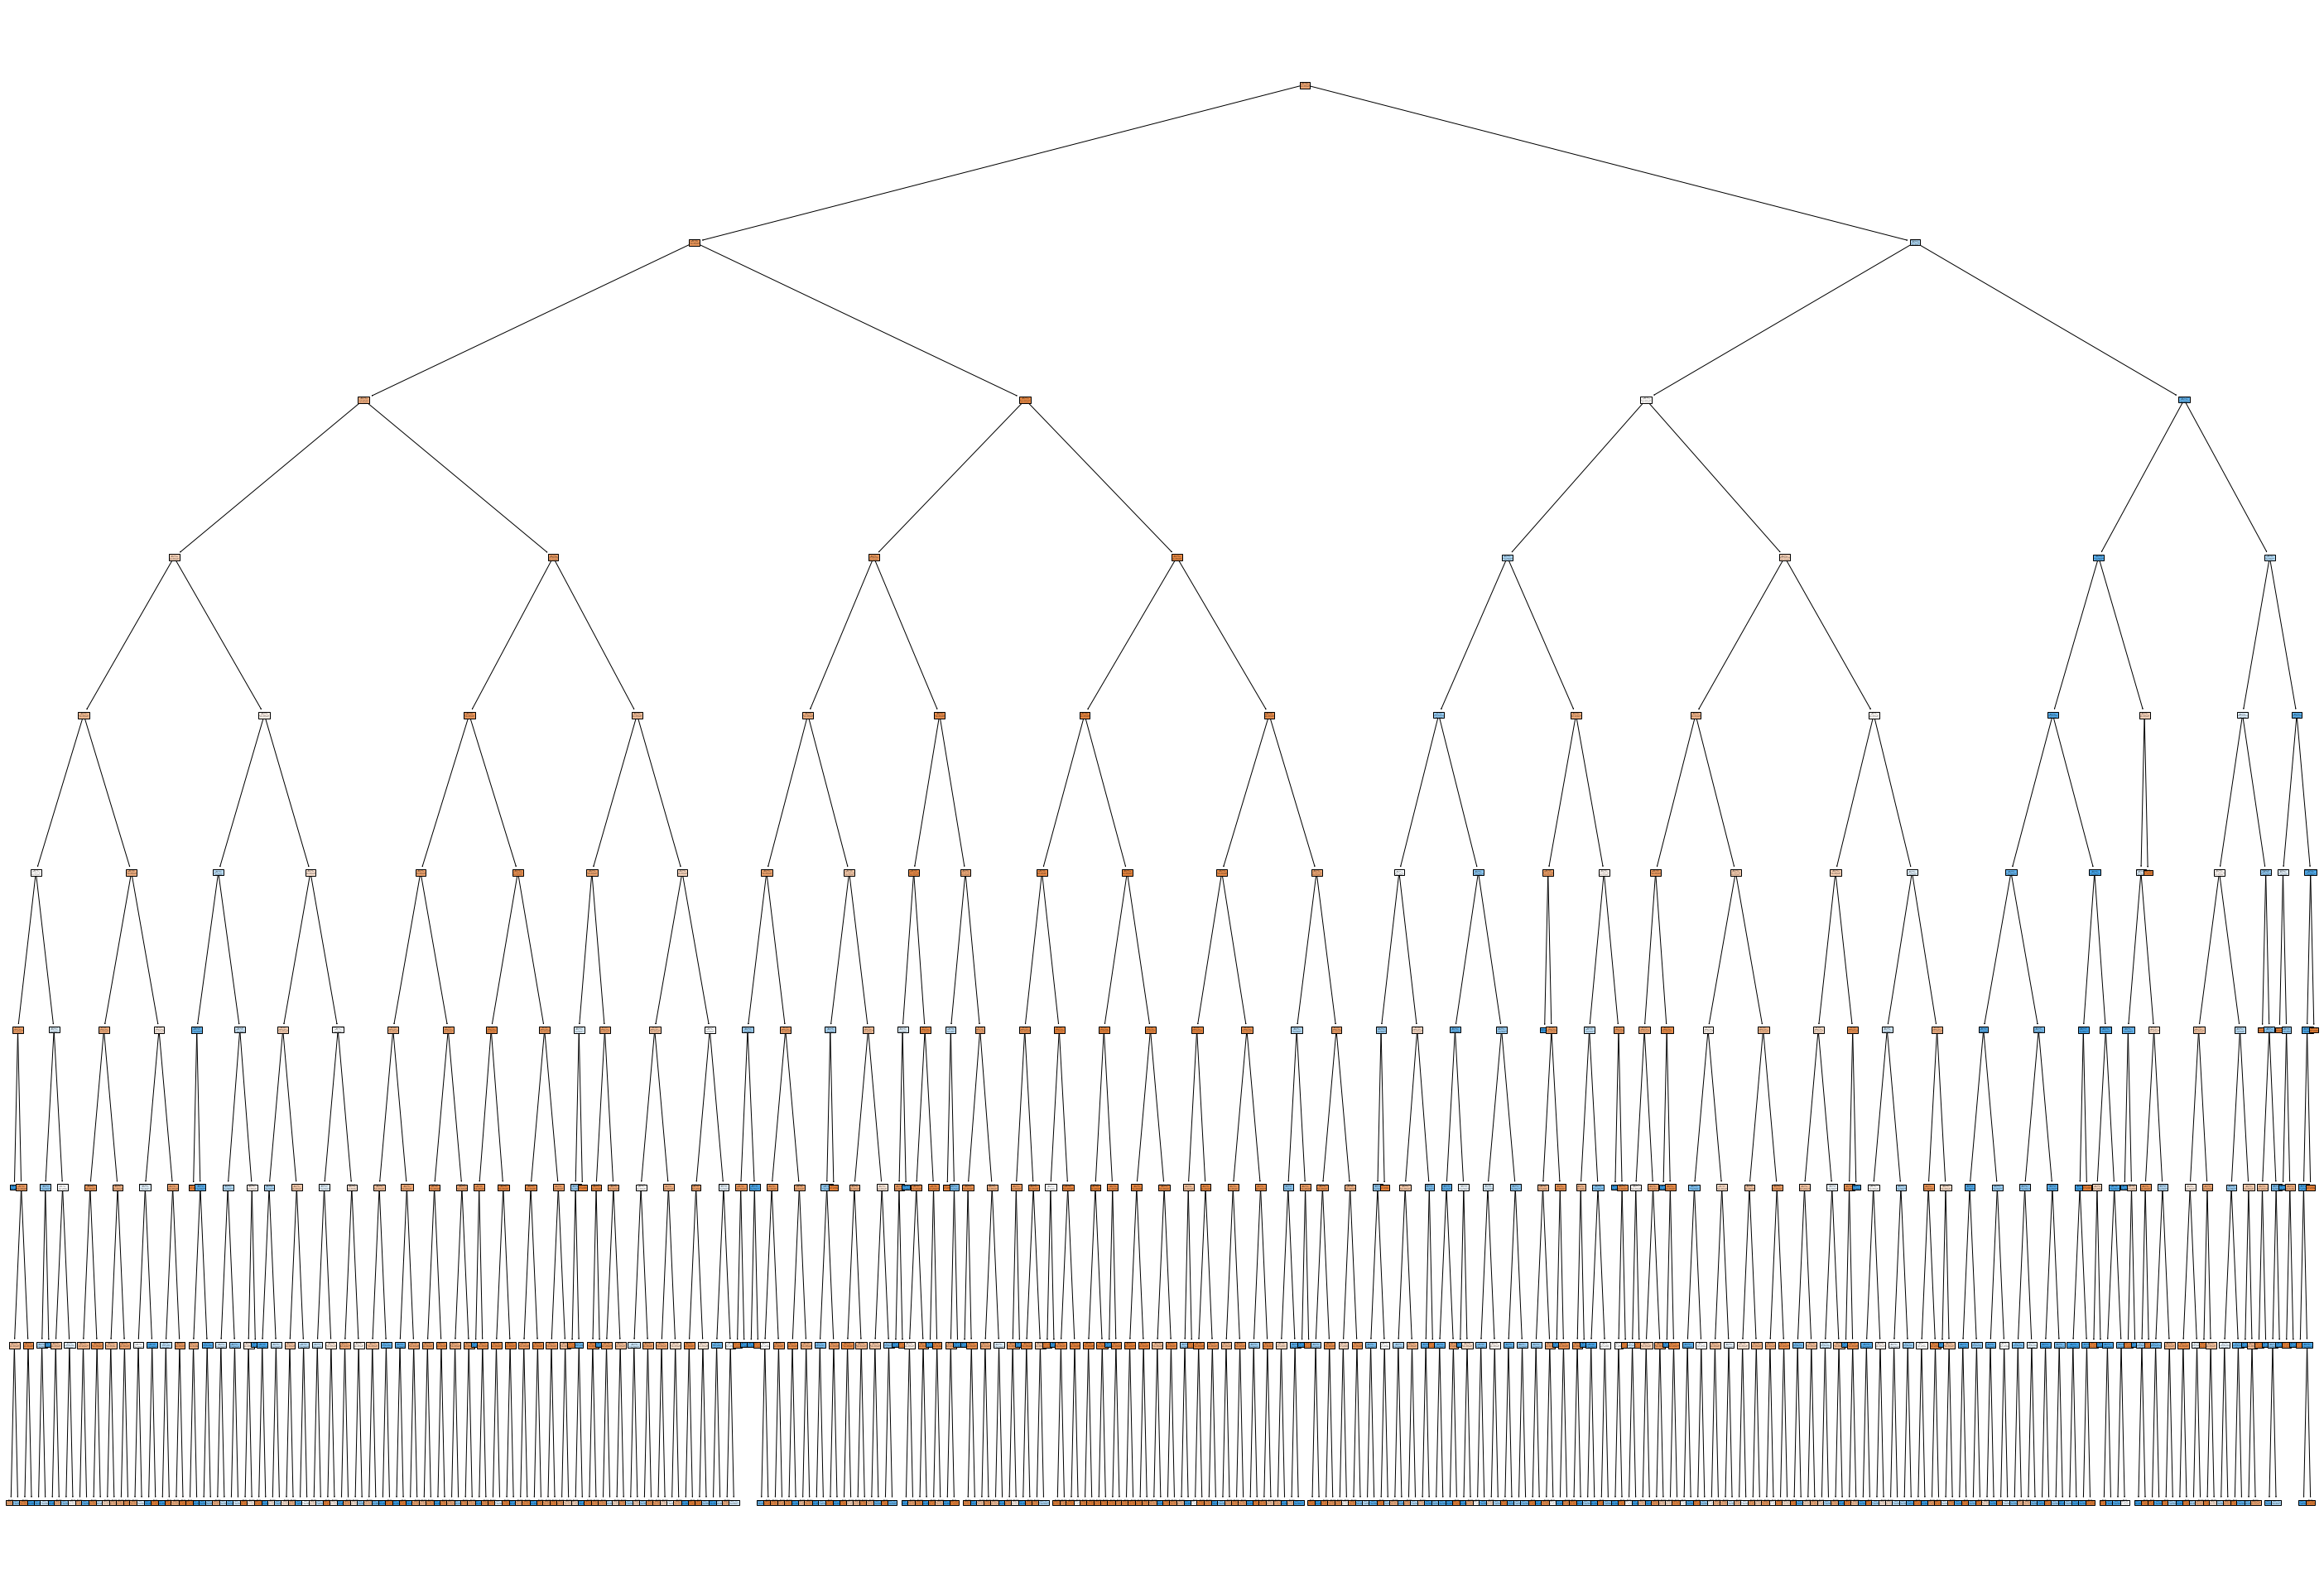

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(50,35))
plot_tree(tree,feature_names=X_train.columns,class_names=["não_choveu","choveu"],proportion=True,filled=True)
plt.show()

100%|██████████| 19/19 [00:09<00:00,  2.00it/s]


6

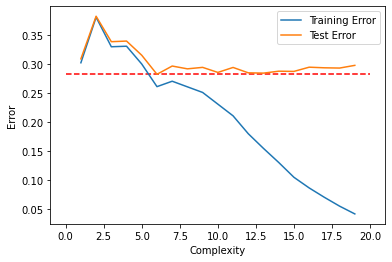

In [26]:
from sklearn.metrics import roc_auc_score
from tqdm.auto import tqdm
complexity = []
error_test = []
error_train = []
for K in tqdm(range(1, 20)):
    complexity.append(K)
    knn = DecisionTreeClassifier(max_depth=K)
    knn.fit(X_train, y_train)
    error_train.append(1 - roc_auc_score(y_train, knn.predict(X_train)))
    error_test.append(1 - roc_auc_score(y_test, knn.predict(X_test)))
plt.plot(complexity, error_train, '-', label='Training Error')
plt.plot(complexity, error_test, '-', label='Test Error')
plt.hlines(min(error_test), 0, 20, colors='red', linestyles='dashed')
plt.xlabel('Complexity')
plt.ylabel('Error')
plt.legend()
error_test.index(min(error_test))+1

In [27]:
pd.DataFrame(tree.feature_importances_,X_train.columns)

,0
mintemp,0.012415
maxtemp,0.007122
rainfall,0.036469
evaporation,0.013116
sunshine,0.159087
humidity9am,0.019171
humidity3pm,0.549336
pressure9am,0.015325
pressure3pm,0.122129
cloud9am,0.002955
